# classification of trash

this is a notebook detecated on finding out if a given trash is recyclable or not
(sur la branche Thomas)

### importation des modules

pour l'instant je fais avec keras

In [22]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

### chargement des données

In [23]:
def load_data(dir_path):
    X=[]
    y=[]
    
    class_map = {'R': 0, 'O': 1}
    
    for label_folder in ['R', 'O']:
        label_path = os.path.join(dir_path, label_folder)
        for img_file in tqdm(os.listdir(label_path), desc=f"Loading {label_folder} images"):
            img_path = os.path.join(label_path, img_file)
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize((64, 64))
                X.append(np.array(img))
                y.append(class_map[label_folder])
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    X = np.array(X)
    y = np.array(y)
    return X, y

normalization of the data

In [45]:
X_train, y_train = load_data('DATASET/TRAIN')

print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")

Loading O images: 100%|██████████| 12565/12565 [00:26<00:00, 475.37it/s] 

Training data shape: (22564, 64, 64, 3), Labels shape: (22564,)


In [ ]:
X_test, y_test = load_data('DATASET/TEST')

print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")

Loading O images: 100%|██████████| 1401/1401 [00:09<00:00, 140.35it/s]


let us show the data a bit and prepare the data

In [47]:
print(f'Number of training samples: {len(X_train)}')
print(f'Number of classes: {len(np.unique(y_train))}')

Number of training samples: 22564
Number of classes: 2


In [46]:
print(X_train[:5])

[[[[235 235 233]
   [235 235 233]
   [237 237 235]
   ...
   [234 235 230]
   [234 235 230]
   [234 235 230]]

  [[235 235 233]
   [235 235 233]
   [236 236 234]
   ...
   [234 235 230]
   [234 235 230]
   [234 235 230]]

  [[235 235 233]
   [235 235 233]
   [235 235 233]
   ...
   [234 235 230]
   [234 235 230]
   [234 235 230]]

  ...

  [[227 176 145]
   [220 169 138]
   [210 159 128]
   ...
   [184 138 114]
   [200 155 127]
   [215 170 141]]

  [[223 172 141]
   [216 165 134]
   [205 154 123]
   ...
   [184 136 113]
   [195 150 123]
   [210 164 137]]

  [[221 170 139]
   [213 162 131]
   [202 151 120]
   ...
   [182 135 111]
   [191 145 119]
   [205 159 133]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [27]:
print(y_train)

[0 0 0 ... 1 1 1]


In [28]:
print(y_train[0:22564:1000])

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [29]:
print(y_train.ndim)

1


In [30]:
print(X_train[0].shape)
print(X_train[0])

(64, 64, 3)
[[[235 235 233]
  [235 235 233]
  [237 237 235]
  ...
  [234 235 230]
  [234 235 230]
  [234 235 230]]

 [[235 235 233]
  [235 235 233]
  [236 236 234]
  ...
  [234 235 230]
  [234 235 230]
  [234 235 230]]

 [[235 235 233]
  [235 235 233]
  [235 235 233]
  ...
  [234 235 230]
  [234 235 230]
  [234 235 230]]

 ...

 [[227 176 145]
  [220 169 138]
  [210 159 128]
  ...
  [184 138 114]
  [200 155 127]
  [215 170 141]]

 [[223 172 141]
  [216 165 134]
  [205 154 123]
  ...
  [184 136 113]
  [195 150 123]
  [210 164 137]]

 [[221 170 139]
  [213 162 131]
  [202 151 120]
  ...
  [182 135 111]
  [191 145 119]
  [205 159 133]]]


In [31]:
X_train = X_train.astype('float32') / 255.0
print(X_train[0])

[[[0.92156863 0.92156863 0.9137255 ]
  [0.92156863 0.92156863 0.9137255 ]
  [0.92941177 0.92941177 0.92156863]
  ...
  [0.91764706 0.92156863 0.9019608 ]
  [0.91764706 0.92156863 0.9019608 ]
  [0.91764706 0.92156863 0.9019608 ]]

 [[0.92156863 0.92156863 0.9137255 ]
  [0.92156863 0.92156863 0.9137255 ]
  [0.9254902  0.9254902  0.91764706]
  ...
  [0.91764706 0.92156863 0.9019608 ]
  [0.91764706 0.92156863 0.9019608 ]
  [0.91764706 0.92156863 0.9019608 ]]

 [[0.92156863 0.92156863 0.9137255 ]
  [0.92156863 0.92156863 0.9137255 ]
  [0.92156863 0.92156863 0.9137255 ]
  ...
  [0.91764706 0.92156863 0.9019608 ]
  [0.91764706 0.92156863 0.9019608 ]
  [0.91764706 0.92156863 0.9019608 ]]

 ...

 [[0.8901961  0.6901961  0.5686275 ]
  [0.8627451  0.6627451  0.5411765 ]
  [0.8235294  0.62352943 0.5019608 ]
  ...
  [0.72156864 0.5411765  0.44705883]
  [0.78431374 0.60784316 0.49803922]
  [0.84313726 0.6666667  0.5529412 ]]

 [[0.8745098  0.6745098  0.5529412 ]
  [0.84705883 0.64705884 0.5254902 ]


In [32]:
def show_image(X, y, index):
    classes = ['R', 'O']
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

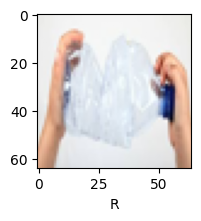

In [33]:
show_image(X_train, y_train, 0)

### Classyfing using CNN

In [34]:
classification_model = Sequential([
    Conv2D(filters=64, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((3,3)),
    Conv2D(filters=64, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D((3,3)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

In [35]:
classification_model.compile(optimizer="adam",
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

In [36]:
classification_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
706/706 [==============================] - 28s 40ms/step - loss: 0.4405 - accuracy: 0.8084
Epoch 2/20
706/706 [==============================] - 29s 41ms/step - loss: 0.3838 - accuracy: 0.8364
Epoch 3/20
706/706 [==============================] - 28s 39ms/step - loss: 0.3593 - accuracy: 0.8476
Epoch 4/20
706/706 [==============================] - 28s 40ms/step - loss: 0.3416 - accuracy: 0.8566
Epoch 5/20
706/706 [==============================] - 28s 40ms/step - loss: 0.3271 - accuracy: 0.8633
Epoch 6/20
706/706 [==============================] - 28s 39ms/step - loss: 0.3115 - accuracy: 0.8706
Epoch 7/20
706/706 [==============================] - 25s 36ms/step - loss: 0.2919 - accuracy: 0.8807
Epoch 8/20
706/706 [==============================] - 25s 35ms/step - loss: 0.2779 - accuracy: 0.8863
Epoch 9/20
706/706 [==============================] - 26s 37ms/step - loss: 0.2634 - accuracy: 0.8914
Epoch 10/20
706/706 [==============================] - 25s 36ms/step - loss: 0.249

### let us test with our testing data

we loaded the test data at the same time as the training data


In [38]:
print(f"Training data shape: {X_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (2513, 64, 64, 3), Labels shape: (2513,)


In [39]:
print(X_test[0].shape)
print(X_test[0])

(64, 64, 3)
[[[120  65  54]
  [162 154 135]
  [184 178 160]
  ...
  [186 178 161]
  [167 161 141]
  [123  78  64]]

 [[113  29  26]
  [109  79  65]
  [170 162 145]
  ...
  [177 170 152]
  [116  92  76]
  [110  35  27]]

 [[102  23  23]
  [118  33  29]
  [102  60  46]
  ...
  [103  60  51]
  [121  35  30]
  [109  23  23]]

 ...

 [[132 122 105]
  [133 123 106]
  [135 123 106]
  ...
  [137 124 108]
  [135 122 106]
  [134 121 105]]

 [[129 120 103]
  [130 121 104]
  [135 122 106]
  ...
  [135 122 106]
  [133 120 104]
  [132 119 103]]

 [[126 118 100]
  [128 120 102]
  [132 119 104]
  ...
  [133 121 105]
  [130 119 102]
  [128 117 100]]]


In [40]:
print(y_test.shape)
print(y_test[0:22564:1000])
print(y_test.ndim)

(2513,)
[0 0 1]
1


In [41]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classification_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


79/79 [==============================] - 1s 10ms/step


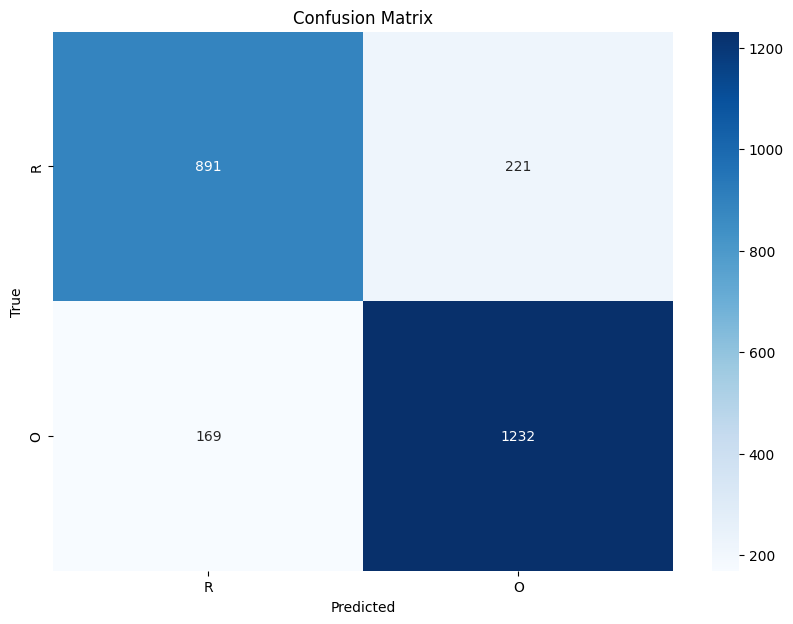

              precision    recall  f1-score   support

           R       0.84      0.80      0.82      1112
           O       0.85      0.88      0.86      1401

    accuracy                           0.84      2513
   macro avg       0.84      0.84      0.84      2513
weighted avg       0.84      0.84      0.84      2513



In [43]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['R', 'O'], yticklabels=['R', 'O'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred_classes, target_names=['R', 'O']))

In [52]:
eval = classification_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval[0]}, Test Accuracy: {eval[1]}")

79/79 [==============================] - 1s 12ms/step - loss: 63.2517 - accuracy: 0.8448
Test Loss: 63.25171661376953, Test Accuracy: 0.8448070287704468


In [53]:
print(f"the accuracy of the model is: {eval[1] * 100:.2f}%")

the accuracy of the model is: 84.48%
